# **Praktikum 6 MA2271 - Shift 3**
**17 Maret 2023**

Nama :                    \
NIM :



# **Nomor 1**

Diberikan masalah nilai awal

\begin{align*}
\mathbf{x'} =
\begin{bmatrix}
1 & -1 & 4 \\
3 & 2 & -1 \\
2 & 1 & -1
\end{bmatrix}
\mathbf{x}, \
\mathbf{x}(0) =
\begin{bmatrix}
3\\
0 \\
-3
\end{bmatrix}
\end{align*}

## **Nomor 1A**

Tentukan nilai dan vektor eigen dari matriks koefisien sistem persamaan diferensial di atas.

In [ ]:
import numpy as np
import numpy.linalg as linalg
# Ketik jawaban Anda dibawah garis.
# -----------------------------------------------------------------------

# Mendefinisikan matriks A
A = np.array([[1,-1,4],[3,2,-1],[2,1,-1]])

# Menentukan nilai dan vektor eigen dari A
eigval_A, eigvec_A = linalg.eig(A)
print('Nilai eigen A:', eigval_A)
print('Vektor eigen A: \n', eigvec_A)

Nilai eigen A: [ 3. -2.  1.]
Vektor eigen A: 
 [[ 0.40824829  0.57735027  0.23570226]
 [ 0.81649658 -0.57735027 -0.94280904]
 [ 0.40824829 -0.57735027 -0.23570226]]


## **Nomor 1B**

Tentukanlah matriks fundamental dari masalah nilai awal tersebut.

In [ ]:
import numpy as np
from sympy import *
# Ketik jawaban Anda dibawah garis.
# -----------------------------------------------------------------------

# Nilai eigen
r1 = eigval_A[0]
r2 = eigval_A[1]
r3 = eigval_A[2]

# Vektor eigen
v1 = eigvec_A[:,[0]]
v2 = eigvec_A[:,[1]]
v3 = eigvec_A[:,[2]]

# Matriks fundamental
Psi = Matrix(np.concatenate((v1*exp(r1*t), v2*exp(r2*t), v3*exp(r3*t)), axis=1))
print('Matriks fundamental: \n')
Psi

Matriks fundamental: 



Matrix([
[0.408248290463863*exp(3.0*t),  0.577350269189626*exp(-2.0*t),  0.235702260395516*exp(1.0*t)],
[0.816496580927726*exp(3.0*t), -0.577350269189626*exp(-2.0*t), -0.942809041582063*exp(1.0*t)],
[0.408248290463863*exp(3.0*t), -0.577350269189626*exp(-2.0*t), -0.235702260395516*exp(1.0*t)]])

## **Nomor 1C**

Tentukan solusi khusus dari MNA tersebut menggunakan matriks fundamental yang telah diperoleh.

In [ ]:
import numpy as np
import numpy.linalg as linalg
from sympy import *
# Ketik jawaban Anda dibawah garis.
# -----------------------------------------------------------------------

# Variabel simbolik
t = symbols('t')
x1, x2, x3 = symbols('x1 x2 x3', cls=Function, Fuction=True)

# Tentukan Psi(0)
Psi0 = Psi.subs(t,0)
Psi0 = np.array(Psi0).astype(np.float64)

# Invers dari Psi(0)
Psi0inv = np.linalg.inv(Psi0)

# Nilai awal
x0 = np.array([[3],[0],[-3]])

# Solusi khusus
sol = Psi @ Psi0inv @x0
sol_x1 = Eq(x1(t), sol[0])
sol_x2 = Eq(x2(t), sol[1])
sol_x3 = Eq(x3(t), sol[2])
print('Solusi khusus:')
display(sol_x1)
display(sol_x2)
display(sol_x3)

Solusi khusus:


Eq(x1(t), -1.0*exp(1.0*t) - 8.88178419700125e-16*exp(3.0*t) + 4.0*exp(-2.0*t))

Eq(x2(t), 4.0*exp(1.0*t) - 1.77635683940025e-15*exp(3.0*t) - 4.0*exp(-2.0*t))

Eq(x3(t), 1.0*exp(1.0*t) - 4.44089209850063e-16*exp(3.0*t) - 4.0*exp(-2.0*t))

# **Nomor 2**

Pandang sistem persamaan diferensial berikut.

\begin{align*}
\mathbf{y'} =
\begin{bmatrix}
0 & -5 \\
1 & \alpha \\
\end{bmatrix}
\mathbf{y}
\end{align*}

## **Nomor 2A**

Berapakah nilai $\alpha$ yang menyebabkan titik $(0,0)$ pada sistem tersebut menjadi stabil?

**Jawab:**

\begin{align*}
|A-\lambda I| =
\begin{vmatrix}
-\lambda & -5 \\
1 & \alpha - \lambda \\
\end{vmatrix}
= \lambda^{2} - \alpha \lambda + 5
= 0
\end{align*}

didapat
$$
\lambda_{1,2} = \frac{\alpha \pm \sqrt{\alpha^{2} - 20}}{2}.
$$



*   Jika $ \alpha^{2} - 20 < 0 $, maka didapat nilai eigen kompleks sehingga haruslah $\alpha < 0$ agar stabil. Selain itu,
$$
\alpha^{2} - 20 < 0 ⇒ \alpha^{2} < 20 ⇒ -2\sqrt{5} < \alpha < 2\sqrt{5}.
$$
Akibatnya, nilai $\alpha$ yang memenuhi kasus ini adalah $-2\sqrt{5} < \alpha < 0$.

*   Jika $ \alpha^{2} - 20 = 0 $, maka didapat nilai eigen yang real dan kembar sehingga haruslah $\alpha < 0$ agar stabil. Perhatikan bahwa
$$
\alpha^{2} - 20 = 0 ⇒ \alpha^{2} = 20 ⇒ \alpha = \pm 2\sqrt{5}.
$$
Akibatnya, nilai $\alpha$ yang memenuhi kasus ini adalah $\alpha = -2\sqrt{5}$.

*   Jika $ \alpha^{2} - 20 > 0 $, maka didapat nilai eigen yang real dan berbeda sehingga haruslah $\lambda < 0$ agar stabil. Perhatikan bahwa
$$
\alpha^{2} - 20 > 0 ⇒ \alpha^{2} > 20 ⇒ \alpha < -2\sqrt{5} \lor \alpha > 2\sqrt{5}.
$$
Akibatnya, nilai $\alpha$ yang memenuhi kasus ini adalah $\alpha < -2\sqrt{5}$.


## **Nomor 2B**

Jika $\alpha = 4$, tentukan tipe dan kestabilan dari titik $(0,0)$ hanya berdasarkan nilai eigen matriks koefisiennya.

In [ ]:
import numpy as np
import numpy.linalg as linalg
# Ketik jawaban Anda dibawah garis.
# -----------------------------------------------------------------------

# Mendefinisikan matriks A
B = np.array([[0,-5],[1,4]])

# Menentukan nilai dan vektor eigen dari A
eigval_B, eigvec_B = linalg.eig(B)
print('Nilai eigen A:', eigval_B)

Nilai eigen A: [2.+1.j 2.-1.j]


**Jawab:**

Nilai eigen bernilai kompleks dengan bagian real positif. Artinya, titik $(0,0)$ adalah spiral point yang tidak stabil.

## **Nomor 2C**

Gambarkan bidang fasa dari sistem untuk $\alpha = 4$ pada domain $[-0.5,0.5] \times [-0.5,0.5]$ beserta beberapa kurva solusinya. Apakah tipe dan kestabilan titik kesetimbangan yang ditampilkan oleh bidang fasa sama dengan yang telah Anda tentukan pada nomor 2B?

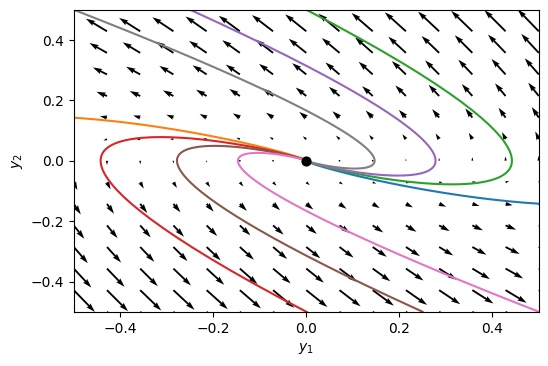

In [ ]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.rcParams['figure.dpi'] = 100
# Ketik jawaban Anda dibawah garis.
# -----------------------------------------------------------------------

# Domain bidang fasa
y1_s = np.linspace(-0.5, 0.5, 15)
y2_s = np.linspace(-0.5, 0.5, 15)

y1_grid, y2_grid = np.meshgrid(y1_s, y2_s)

# Gambar bidang fasa
plt.quiver(y1_grid, y2_grid, -5*y2_grid, y1_grid+4*y2_grid)
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')

# Gambar trajektori solusi
def model(U, t):
    y1, y2 = U
    dy1dt = -5*y2
    dy2dt =  y1 + 4*y2
    return [dy1dt, dy2dt]

inits = [[0.5, 0.5], [-0.5, -0.5], [0, 0.5], [0, -0.5], [-0.25, 0.5], [0.25, -0.5], [0.5, -0.5], [-0.5, 0.5]]
for y1y2_i in inits:
    tspan = np.linspace(0, -5, 200)
    ys = odeint(model, y1y2_i, tspan)
    plt.plot(ys[:, 0], ys[:, 1])
plt.scatter(0,0,zorder = 10, s = 40, edgecolors='k', facecolors='k',
            linewidth=1)
plt.xlim([-0.5, 0.5])
plt.ylim([-0.5, 0.5])
plt.show()

**Jawab:**

Berdasarkan bidang fasa, medan gradien berputar ke luar titik $(0,0)$. Artinya, titik $(0,0)$ adalah spiral point yang tidak stabil. Hasil ini sama seperti yang telah ditentukan pada nomor 2B.

# **Nomor 3**

Dalam model yang dikemukakan oleh Kuznetsov dan Taylor pada tahun 1994 dan disederhanakan oleh Galach pada tahun 2003, diketahui bahwa **sel tumor** dan **sel normal** dalam tubuh saling berkompetisi dan mengikuti model berikut: \

$$
\frac{dN}{dt} = r_{1}N(1 - b_{1}N) - \beta_{1}NT \\
\frac{dT}{dt} = r_{2}T(1 - b_{2}T) - \beta_{2}NT
$$

dengan $N(t)$ menyatakan jumlah populasi sel normal dalam tubuh setiap waktu, $T(t)$ menyatakan jumlah populasi sel tumor dalam tubuh setiap waktu, dan $N(t),T(t) > 0$.

## **Nomor 3A**

Misalkan sel tumor dan sel normal dalam tubuh seorang penderita berkompetisi menurut parameter $r_{1} = 1, b_{1} = 1, \beta_{1} = 0.5, r_{2} = 3, b_{2} = 0.5, \beta_{2} = 0.25$. Tentukan titik-titik ekuilibrium dari masalah ini.

**Jawab:**

Titik ekuilibrium adalah titik-titik yang memenuhi persamaan
$$
\frac{dN}{dt} = 0 \\
\frac{dT}{dt} = 0
$$

Untuk memudahkan dalam mencarinya, tuliskan kembali sistem sebagai
$$
\frac{dN}{dt} = N[(1 - N) - 0.5T] \\
\frac{dT}{dt} = T[3(1 - 0.5T) - 0.25N]
$$

\
*   Jika $N = 0$ dan $T = 0$, diperoleh titik $(N,T)=(0,0)$

*   Jika $N = 0$ dan $3(1 - 0.5T) - 0.25N = 0$, diperoleh titik $(N,T)=(0,2)$

*   Jika $(1 - N) - 0.5T = 0$ dan $T = 0$, diperoleh titik $(N,T)=(1,0)$

*   Jika $(1 - N) - 0.5T = 0$ dan $3(1 - 0.5T) - 0.25N = 0$, maka dapat diperiksa bahwa kita juga akan mendapatkan titik $(0,2)$.

\
Akibatnya, titik ekuilibrium dari sistem tersebut adalah $(N,T) = (0,0), (1,0), (0,2)$.

## **Nomor 3B**

Gambarkan dinamika populasi sel tumor terhadap populasi sel normal akibat kompetisi tersebut beserta beberapa trajektori solusinya.

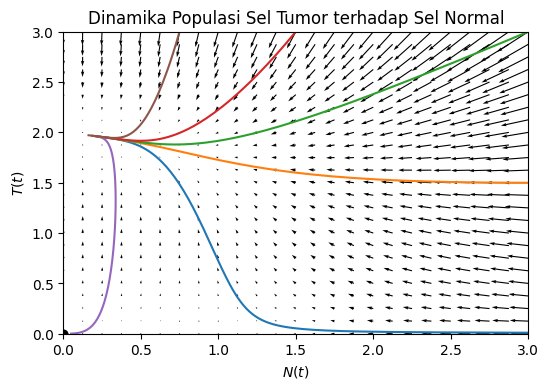

In [ ]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.rcParams['figure.dpi'] = 100
# Ketik jawaban Anda dibawah garis.
# -----------------------------------------------------------------------

# Parameter
r1 = 1
b1 = 1
beta1 = 0.5
r2 = 3
b2 = 0.5
beta2 = 0.25

# Domain bidang fasa
N_s = np.linspace(0, 3, 25)
T_s = np.linspace(0, 3, 25)

N_g, T_g = np.meshgrid(N_s, T_s)

# Gambar bidang fasa
plt.quiver(N_g, T_g, r1*N_g*(1-b1*N_g)-beta1*N_g*T_g, r2*T_g*(1-b2*T_g)-beta2*N_g*T_g)
plt.xlabel('$N(t)$')
plt.ylabel('$T(t)$')

# Gambar trajektori solusi
def model(U, t):
    N, T = U
    dNdt = r1*N*(1-b1*N)-beta1*N*T
    dTdt = r2*T*(1-b2*T)-beta2*N*T
    return [dNdt, dTdt]

inits = [[3, 0.01], [3, 1.5], [3, 3], [1.5, 3], [0.05, 0.001], [0.75, 3]]
for y1y2_i in inits:
    tspan = np.linspace(0, 5, 200)
    ys = odeint(model, y1y2_i, tspan)
    plt.plot(ys[:, 0], ys[:, 1])
plt.scatter(0,0,zorder = 10, s = 40, edgecolors='k', facecolors='k',
            linewidth=1)
plt.xlim([0, 3])
plt.ylim([0, 3])
plt.title('Dinamika Populasi Sel Tumor terhadap Sel Normal')
plt.show()

## **Nomor 3C**

Apakah pengidap tumor tersebut akan sembuh total suatu hari nanti?

**Jawab:**

Berdasarkan potret fasa, seluruh solusi menuju pada titik tetap $(0,2)$ yang berarti untuk jangka waktu yang lama, sel normal akan habis dikalahkan oleh keberadaan sel tumor yang masih bertahan dalam tubuh. Dengan demikian, pengidap tumor dapat dikatakan tidak akan sembuh.